### Dependencies

In [3]:
from netgen.geom2d import unit_square
from ngsolve import *
from ngsolve import grad as ngsolvegrad
from ngsolve.comp import ProxyFunction
from ngsolve.webgui import Draw
#import netgen.gui
import numpy
import pandas as pd
import import_ipynb ### Allows importing the functions in the Refactor notebook
import Refactor ### Notebook that contains functions

importing Jupyter notebook from Refactor.ipynb


### EDG and EHDG without correction

In [3]:
config = Refactor.config
config['correction'] = False
CT = Refactor.Convection_Diffusion(config)
edg_table_no = CT._solveDG()
ehdg_table_no = CT._solveHDG()

KeyboardInterrupt: 

In [3]:
edg_table_no.to_csv("edg_table_no.csv")
ehdg_table_no.to_csv("ehdg_table_no.csv")

### EDG and EHDG with correction

In [4]:
config = Refactor.config
config['correction'] = True
CT = Refactor.Convection_Diffusion(config)
edg_table_yes = CT._solveDG()
ehdg_table_yes = CT._solveHDG()

In [5]:
edg_table_yes.to_csv("edg_table_yes.csv")
ehdg_table_yes.to_csv("ehdg_table_yes.csv")

### Visualization

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import pandas as pd
from functools import reduce
from IPython.display import Image, display
import matplotlib.image as mpimg

In [44]:
def error_plot(table, **kwargs):
    orders =[1, 2, 3, 4]
    mesh_size = [1.0,0.5,0.25,0.125,0.0625,0.0313]

    count=1
    nrows = len(orders)
    ncols = len(mesh_size)
    plt.figure(figsize=(20,10))
    
    if 'bonus_int' in kwargs:
        variable  = 'Bonus Int'
        val = kwargs['bonus_int']
    else:
        variable  = 'Alpha'
        val = kwargs['alpha']

    for order in orders:
        for size in mesh_size:
            df = table[table.Order.eq(order) & table['Mesh Size'].eq(size) & table[variable].eq(val)]
            ax = plt.subplot(nrows, ncols, count)
            if 'bonus_int' in kwargs:
                df.plot(x="Alpha", y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), logy=True)
            else:
                df.plot(x="Bonus Int", y='Error', legend=True, ax=ax, title='k = ' + str(order) + ', h =' + str(size), loglog=True)
            ax.set_ylabel('L2 Error')
            count = count + 1
            
    plt.tight_layout()              

In [9]:
edg_table_no = pd.read_csv("Files/edg_table_no.csv", index_col=0)
edg_table_yes = pd.read_csv("Files/edg_table_yes.csv", index_col=0)
ehdg_table_no = pd.read_csv("Files/ehdg_table_no.csv", index_col=0)
ehdg_table_yes = pd.read_csv("Files/ehdg_table_yes.csv", index_col=0)

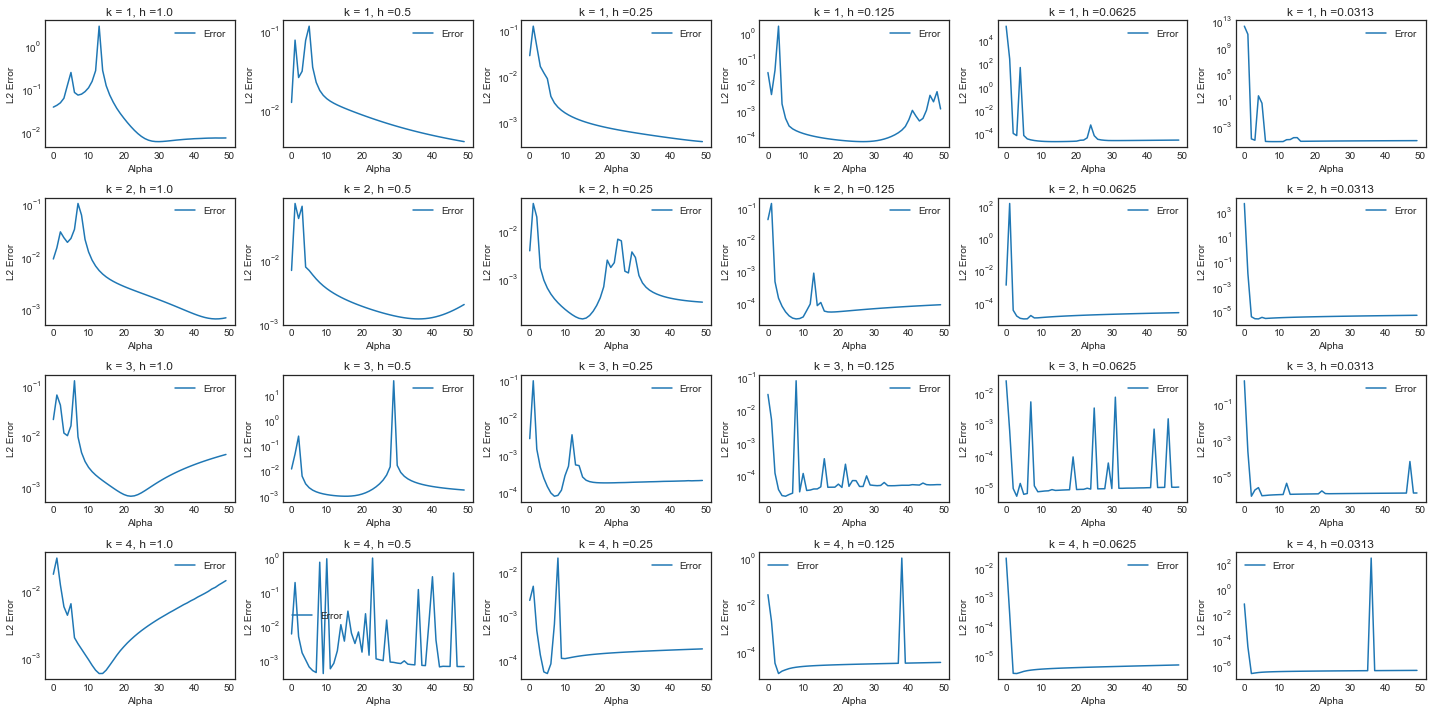

In [46]:
error_plot(edg_table_no, bonus_int=5)